<a href="https://colab.research.google.com/github/dheaayusafitri/020_dheaayuposttest2datmin/blob/main/020_Dhea_Ayu_Safitri_Posttest2_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [2]:
import pandas as pd
df = pd.read_excel('Dataset.xlsx') # Untuk baca Dataset

df #Menampilkan data

,whole milk,sausage,soda,canned beer,frankfurter,beef,butter,frozen vegetables,tropical fruit,butter milk,...,dental care,detergent,cling film/bags,misc. beverages,hygiene articles,pickled vegetables,salty snack,pastry,yogurt,semi-finished bread
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.sum() #Menghitung total dari setiap item

whole milk             5
sausage                4
soda                   3
canned beer            1
frankfurter            2
beef                   1
butter                 1
frozen vegetables      1
tropical fruit         1
butter milk            1
frozen meals           1
rolls/buns             3
root vegetables        1
dish cleaner           1
whipped/sour cream     1
curd                   1
other vegetables       1
white bread            1
sugar                  1
specialty chocolate    1
dental care            1
detergent              1
cling film/bags        1
misc. beverages        1
hygiene articles       1
pickled vegetables     1
salty snack            1
pastry                 1
yogurt                 1
semi-finished bread    1
dtype: int64

In [4]:
# Melihat nama nama kolom
df.columns

Index(['whole milk', 'sausage', 'soda', 'canned beer', 'frankfurter', 'beef',
       'butter', 'frozen vegetables', 'tropical fruit', 'butter milk',
       'frozen meals', 'rolls/buns', 'root vegetables', 'dish cleaner',
       'whipped/sour cream', 'curd', 'other vegetables', 'white bread',
       'sugar', 'specialty chocolate', 'dental care', 'detergent',
       'cling film/bags', 'misc. beverages', 'hygiene articles',
       'pickled vegetables', 'salty snack', 'pastry', 'yogurt',
       'semi-finished bread'],
      dtype='object')

In [5]:

# 2 Item set (Kombinasi)
from itertools import permutations #Library untuk buat kombinasi barang

# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'sausage'),
 ('whole milk', 'soda'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'beef'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'white bread'),
 ('whole milk', 'sugar'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'dental care'),
 ('whole milk', 'detergent'),
 ('whole milk', 'cling film/bags'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'pastry'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'semi-finished bread'),
 ('sausage', 'whole milk'),
 ('sausage', 'soda'),
 ('sausa

In [6]:
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('whole milk', 'sausage'),
 ('whole milk', 'soda'),
 ('whole milk', 'butter'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'pastry'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'semi-finished bread'),
 ('sausage', 'whole milk'),
 ('sausage', 'rolls/buns'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'yogurt'),
 ('sausage', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('soda', 'pickled vegetables'),
 ('canned beer', 'misc. beverages'),
 ('frankfurter', 'soda'),
 ('frankfurter', 'whipped/sour cream'),
 ('frankfurter', 'curd'),
 ('beef', 'white bread'),
 ('butter', 'whole milk'),
 ('frozen vegetables', 'other vegetables'),
 ('tropical fruit', 'sugar'),
 ('butter milk', 'specialty chocolate'),
 ('frozen meals', 'dental care'),
 ('rolls/buns', 'whole milk'),
 ('rolls/buns', 'sausage'),
 ('root vegetables', 'detergent'),
 ('dish cleaner', 'cling film/bags'),
 ('whipped/sour cream', 'soda'),

In [7]:
# Menghitung Banyaknya orang yang beli secara bersamaan/kombinasi
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'sausage')": 2,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'butter')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'pastry')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'semi-finished bread')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'rolls/buns')": 2,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('canned beer', 'misc. beverages')": 1,
 "('frankfurter', 'soda')": 1,
 "('frankfurter', 'whipped/sour cream')": 1,
 "('frankfurter', 'curd')": 1,
 "('beef', 'white bread')": 1,
 "('butter', 'whole milk')": 1,
 "('frozen vegetables', 'other vegetables')": 1,
 "('tropical fruit', 'sugar')": 1,
 "('butter milk', 'specialty chocolate')": 1,
 "('frozen meals', 'dental care')": 1,
 "('rolls/buns', 'whole milk'

In [8]:
# Melihat banyak transaksi/data
len(df)

19

In [9]:
# List support (Jumlah kombinasi)
# supp = [i/len(df)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

---
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'pastry') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'rolls/buns') support = 10.526315789473683%
('sausage', 'hygiene articles') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('soda', 'whole milk') support = 5.263157894736842%
('soda', 'frankfurter') support = 5.263157894736842%
('soda', 'whipped/sour cream') support = 5.263157894736842%
('soda', 'pickled vegetables') support = 5.263157894736842%
('canned beer', 'misc. bevera

In [10]:
# List Confidens (Menghitung persentase dalam bentuk confidence)
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

---
whole milk->sausage  Confidence = 40.0%
whole milk->soda  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->pastry  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->semi-finished bread  Confidence = 20.0%
sausage->whole milk  Confidence = 50.0%
sausage->rolls/buns  Confidence = 50.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->semi-finished bread  Confidence = 25.0%
soda->whole milk  Confidence = 33.33333333333333%
soda->frankfurter  Confidence = 33.33333333333333%
soda->whipped/sour cream  Confidence = 33.33333333333333%
soda->pickled vegetables  Confidence = 33.33333333333333%
canned beer->misc. beverages  Confidence = 100.0%
frankfurter->soda  Confidence = 50.0%
frankfurter->whipped/sour cream  Confidence = 50.0%
frankfurter->curd  Confidence = 50.0%
beef->white bread  Confidence = 100.0%
butter->whole milk

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

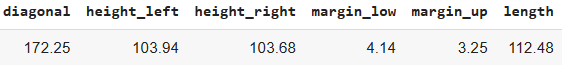
<!-- 1412 -->

In [11]:
df2 = pd.read_excel ('Datauang.xlsx') #Impor data
df2 #Menampilkan dataframe dalam bentuk tabel

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

In [12]:
# import library numpy
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - new_data['diagonal'].values[0])**2
    + (df2['height_left'] - new_data['height_left'].values[0])**2
    + (df2['height_right'] - new_data['height_right'].values[0])**2
    + (df2['margin_low'] - new_data['margin_low'].values[0])**2
    + (df2['margin_up'] - new_data['margin_up'].values[0])**2
    + (df2['length'] - new_data['length'].values[0])**2
)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])

Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


In [13]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df2)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

In [14]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

# Mengurutkan data dari kecil ke besar
sorted = df2.sort_values('distance')

# Menentukan nilai k
k = int(np.sqrt(len(df2)))

# Menentukan data terdekat
data_terdekat = sorted.head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


In [15]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak
print("Berdasarkan jawaban dari nomor 2, maka hasil prediksinya adalah : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))


Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 

Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis

> Nama : Dhea Ayu Safitri

> Nim : 2109116020


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# **Judul**

## Memprediksi pasien yang didiagnosis menderita penyakit jantung di Rumah Sakit Cleveland. 

## Business Understanding

Determine Business Objectives 

*   Memprediksi kemungkinan seorang pasien menderita penyakit jantung berdasarkan
data yang diberikan, sehingga dapat membantu dokter dalam diagnosis dan pengobatan pasien.
*   Meningkatkan akurasi diagnosis penyakit jantung dan mengurangi kesalahan diagnosis.

Assess Situation



*   Menentukan lingkup proyek dan area yang akan dianalisis, seperti atribut yang akan digunakan dan populasi target.
*   Menilai kebutuhan data yang diperlukan dan sumber data yang tersedia.
*   Menentukan metode analisis yang akan digunakan dan algoritma yang sesuai untuk memprediksi kondisi pasien.





Determine Data Mining Goals

*   Mengembangkan model prediksi untuk memprediksi apakah seseorang menderita penyakit jantung berdasarkan data klinis yang diberikan.
*   Meningkatkan akurasi dan keandalan prediksi diagnosis penyakit jantung.


Produce Project Plan

*   Menentukan tujuan proyek
*   Menentukan pendekatan data mining
*   Menentukan metodologi dan algoritma
*   Menentukan sumber daya
*   Menentukan jadwal proyek
*   Menentukan evaluasi proyek




## Data Understanding

Collect Initial Data

Data pasien penderita penyakit jantung didapatkan dari website resmi kaggle dan dapat dilihat pada link berikut : https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

Dataset ini terdiri dari 297 sampel dan 14 atribut.





In [20]:
import pandas as pd

df = pd.read_csv('heart_cleveland_upload.csv') # Untuk baca Dataset

Describe Data

Dataset yang digunakan memiliki 297 baris pasien penderita penyakit jantung di Rumah Sakit Cleveland, yang tersusun dalam 14 kolom.

In [19]:
df #Menampilkan data pasien penyakit jantung

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [23]:
# Melihat informasi umum dari dataset
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [22]:
print("Daftar kolom pada dataframe :")
for col in df.columns:
  print(col)

Daftar kolom pada dataframe :
age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
condition


Explore Data

<Axes: xlabel='sex', ylabel='count'>

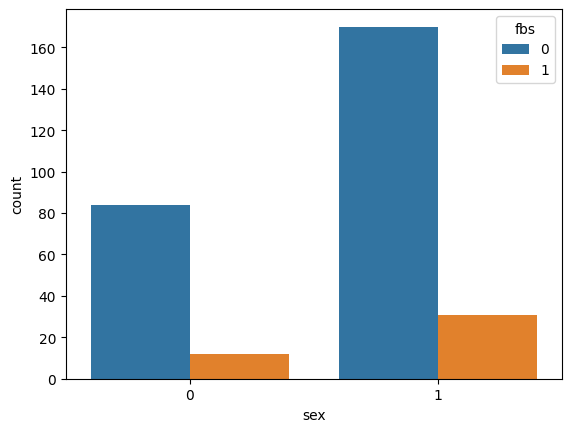

In [25]:
import seaborn as sns
sns.countplot(data=df,x="sex",hue="fbs")

<Axes: xlabel='ca', ylabel='count'>

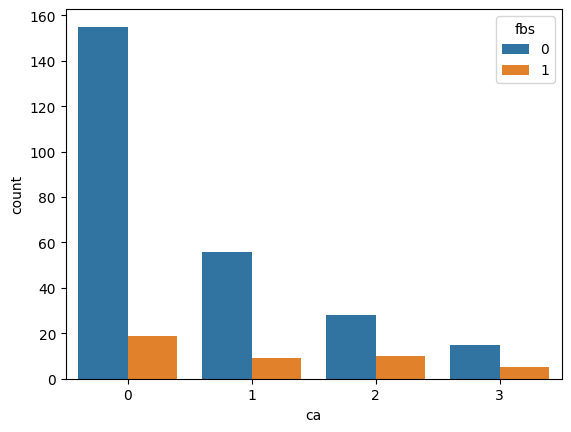

In [27]:

sns.countplot(data=df,x="ca",hue="fbs")

Verify Data Quality

Dilakukan verifikasi kualitas data dengan cara memeriksa data berdasarkan beberapa indikator kualitas data, seperti kelengkapan data, validitas data dan duplikasi data.

Validitas Data

---

Data - data yang tercakup pada dataframe di atas valid, karena berdasarkan sumber datanya, data tersebut adalah data pasien penderita penyakit jantung di Rumah Sakit Cleveland

Link Dataset : https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci


Duplikasi Data

---



In [30]:
is_duplicated = df.duplicated().any()

print("Status Duplikasi :",is_duplicated)
#Berdasarkan output di atas, data - data yang pada dataframe tidak memiliki duplikasi data

Status Duplikasi : False



## Data Preparation

Select Data

In [31]:
df = pd.read_csv('heart_cleveland_upload.csv') # Untuk baca Dataset

Clean Data

In [32]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Berdasarkan output di atas, diketahui bahwa tidak terdapat nilai kosong atau nilai N/A pada dataframe sehingga dapat disimpulkan bahwa data sudah clean 

Transform Data

In [33]:
df = pd.get_dummies(df)
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  condition
0     69    1   0       160   234    1        2      131      0      0.1      1   1     0          0
1     69    0   0       140   239    0        0      151      0      1.8      0   2     0          0
2     66    0   0       150   226    0        0      114      0      2.6      2   0     0          0
3     65    1   0       138   282    1        2      174      0      1.4      1   1     0          1
4     64    1   0       110   211    0        2      144      1      1.8      1   0     0          0
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   ...        ...
292   40    1   3       152   223    0        0      181      0      0.0      0   0     2          1
293   39    1   3       118   219    0        0      140      0      1.2      1   0     2          1
294   35    1   3       120   198    0        0      130      1      1.6      1   0     2  

Output diatas menandakan bahwa dataset selesai di-transform dan dapat dilihat bahwa tidak ada perbedaan antara output transform data dengan output select data, hal ini disebabkan oleh value atau nilai pada dataframe bertipe numerik Sehingga saat dilakukan transform data ke tipe numerik, data tidak ada yang berubah.

Split Data

In [34]:
from sklearn.model_selection import train_test_split
x = df.drop('ca',axis=1)
y = df['ca']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  thal  condition
266   49    0   3       130   269    0        0      163      0      0.0      0     0          0
37    56    0   1       140   294    0        2      153      0      1.3      1     0          0
16    52    1   0       152   298    1        0      178      0      1.2      1     2          0
253   53    0   3       138   234    0        2      160      0      0.0      0     0          0
144   42    1   2       120   240    1        0      194      0      0.8      2     2          0
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...    ...   ...        ...
188   62    0   3       140   394    0        2      157      0      1.2      1     0          0
71    29    1   1       130   204    0        2      202      0      0.0      0     0          0
106   56    1   2       130   256    1        2      142      1      0.6      1     1          1
270   47    1   3       110   